In [ ]:
#To convert categorical variables (like 'application' and 'manufacturer') into a code vector
#and include numerical variables in the process,
 #you can use techniques such as one-hot encoding for categorical variables
#and concatenate them with the numerical variables.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/DataMills.csv')

# Display the first few rows of the original DataFrame
print("Original Data:")
print(df.head())

# Convert categorical variables to one-hot encoded vectors
categorical_columns = ['Application', 'Manufacturer']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
print("\nEncoded Data:")
print(df_encoded.head())

# Concatenate the one-hot encoded DataFrame with the 'Entitlement' column
# Assuming 'Entitlement' is the numerical variable
final_df = pd.concat([df_encoded, df['Entitlement']], axis=1)

# Display the first few rows of the final DataFrame with the encoded vector
print("\nFinal Data with Encoded Vector:")
print(final_df.head())

# Save the final DataFrame with the encoded vector to a CSV file
final_df.to_csv('converted.csv', index=False)


Original Data:
             Application      Manufacturer Entitlement  Unnamed: 3
0  !Quick Screen Capture   Nobuatsu Sekine           1         NaN
1       1E NomadBranch 6           1E Ltd.       12000         NaN
2             2Animate 2  2Simple Software          10         NaN
3              2Create 1  2Simple Software          10         NaN
4     2Paint a Picture 1  2Simple Software          10         NaN

Encoded Data:
  Entitlement  Unnamed: 3  Application_!Quick Screen Capture  \
0           1         NaN                                  1   
1       12000         NaN                                  0   
2          10         NaN                                  0   
3          10         NaN                                  0   
4          10         NaN                                  0   

   Application_1E NomadBranch 6  Application_2Animate 2  \
0                             0                       0   
1                             1                       0   
2     

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/converted.csv')

# Display the first few rows of the DataFrame
print("Original Data:")
print(df.head())

# Select relevant columns for features (X) and target variable (y)
features = ['Application', 'Manufacturer']
X = df[features]

# Preprocess 'Entitlement' column to handle non-numeric values
df['Entitlement'] = df['Entitlement'].apply(lambda x: float(''.join(filter(str.isdigit, str(x)))))

y = df['Entitlement']

# Convert categorical variables to one-hot encoded vectors
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
try:
    model = LinearRegression()
    model.fit(features_train, target_train)
except Exception as e:
    print("Error during training:", e)

# Make predictions on the test set
try:
    y_pred = model.predict(features_test)

    # Evaluate the model
    mse = mean_squared_error(target_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Print coefficients and intercept
    print("\nCoefficients:")
    print(model.coef_)
    print("\nIntercept:")
    print(model.intercept_)
except Exception as e:
    print("Error during prediction:", e)


Original Data:
             Application      Manufacturer Entitlement  Unnamed: 3
0  !Quick Screen Capture   Nobuatsu Sekine           1         NaN
1       1E NomadBranch 6           1E Ltd.       12000         NaN
2             2Animate 2  2Simple Software          10         NaN
3              2Create 1  2Simple Software          10         NaN
4     2Paint a Picture 1  2Simple Software          10         NaN
Mean Squared Error: 7.802955451789793e+30

Coefficients:
[ 1.86566874e+16 -5.20337393e+16  6.45312668e+15 ... -7.17182499e+14
 -8.85873960e+14 -3.58706260e+14]

Intercept:
553018.1777243741


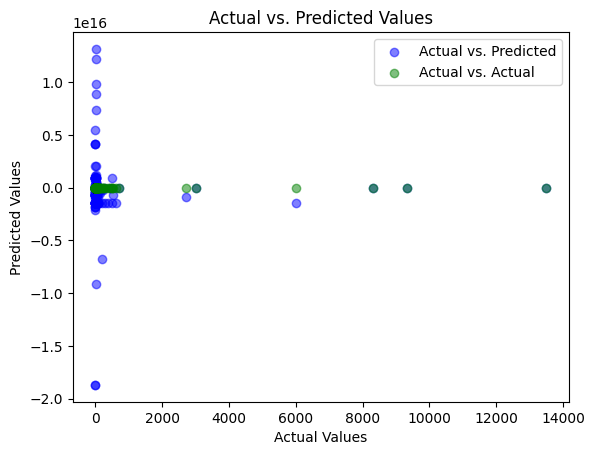

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values with different colors
plt.scatter(target_test, y_pred, alpha=0.5, label='Actual vs. Predicted', c='blue')
plt.scatter(target_test, target_test, alpha=0.5, label='Actual vs. Actual', c='green')  # Added for comparison with actual values
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Root Mean Squared Error:  2366.0507917859554
Range of Target Variable: 553027.0
Percentage of RMSE: 0.4278363970992294


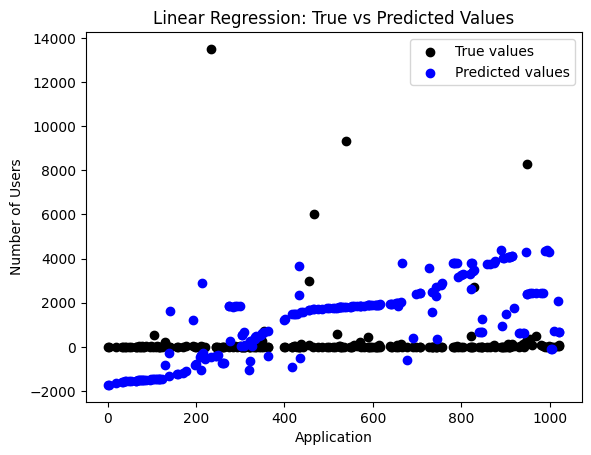

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'software_dataset.csv' is your dataset file
df = pd.read_csv('converted.csv')

# Preprocess 'entitlement' column to handle non-numeric values
df['Entitlement'] = df['Entitlement'].apply(lambda x: float(''.join(filter(str.isdigit, str(x)))))

# Select features and target variable
features = ['Application', 'Manufacturer']
X = df[features]

# Target variable
y = df['Entitlement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error: ", rmse)
# Assuming 'df' is your DataFrame
target_variable = 'Entitlement'

# Find the range of the target variable
range_of_target = df[target_variable].max() - df[target_variable].min()

print("Range of Target Variable:", range_of_target)
rmse = 2366.0507917859554
range_of_target = 553027.0

percentage_of_rmse = (rmse / range_of_target) * 100
print("Percentage of RMSE:", percentage_of_rmse)

# Plot the linear regression
plt.scatter(X_test.iloc[:, 0], y_test, color='black', label='True values')
plt.scatter(X_test.iloc[:, 0], predictions, color='blue', label='Predicted values')
plt.xlabel('Application')
plt.ylabel('Number of Users')
plt.title('Linear Regression: True vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/converted.csv')

label_encoder = LabelEncoder()
df['Application'] = label_encoder.fit_transform(df['Application'])
df['Manufacturer'] = label_encoder.fit_transform(df['Manufacturer'])

print(df.head())

df.to_csv('convertedcsv.csv', index=False)

   Application  Manufacturer Entitlement  Unnamed: 3
0            0           173           1         NaN
1            1             0       12000         NaN
2            2             1          10         NaN
3            3             1          10         NaN
4            4             1          10         NaN


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Read data from CSV file
df = pd.read_csv('/content/convertedcsv.csv')

# Convert numeric columns to strings
df['Manufacturer'] = df['Manufacturer'].astype(str)
df['Application'] = df['Application'].astype(str)
df['Entitlement'] = df['Entitlement'].astype(str)

# Combine the categorical columns into a single string for each row
df['combined_text'] = df['Manufacturer'] + ' ' + df['Application'] + ' ' + df['Entitlement']

# Use CountVectorizer to convert text into a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['combined_text'])

# Calculate cosine similarity between rows
cosine_sim = cosine_similarity(X, X)

# Print the cosine similarity matrix
print("Cosine Similarity Matrix:")
print(cosine_sim)
df.to_csv('diff.csv', index=False)


Cosine Similarity Matrix:
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.70710678 0.57735027 0.        ]
 ...
 [0.         0.         0.70710678 ... 1.         0.40824829 0.        ]
 [0.         0.         0.57735027 ... 0.40824829 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/diff.csv')

# Display the first few rows of the DataFrame
print("Original Data:")
print(df.head())

# Select relevant columns for features (X) and target variable (y)
features = ['Application', 'Manufacturer']
X = df[features]

# Preprocess 'Entitlement' column to handle non-numeric values
df['Entitlement'] = df['Entitlement'].apply(lambda x: float(''.join(filter(str.isdigit, str(x)))))

y = df['Entitlement']

# Convert categorical variables to one-hot encoded vectors
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
try:
    model = LinearRegression()
    model.fit(features_train, target_train)
except Exception as e:
    print("Error during training:", e)

# Make predictions on the test set
try:
    y_pred = model.predict(features_test)

    # Evaluate the model
    mse = mean_squared_error(target_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Print coefficients and intercept
    print("\nCoefficients:")
    print(model.coef_)
    print("\nIntercept:")
    print(model.intercept_)
except Exception as e:
    print("Error during prediction:", e)


Original Data:
   Application  Manufacturer Entitlement  Unnamed: 3 combined_text
0            0           173           1         NaN       173 0 1
1            1             0       12000         NaN     0 1 12000
2            2             1          10         NaN        1 2 10
3            3             1          10         NaN        1 3 10
4            4             1          10         NaN        1 4 10
Mean Squared Error: 5598196.349310948

Coefficients:
[ 1.45904356 17.75424419]

Intercept:
-1747.6067791347443


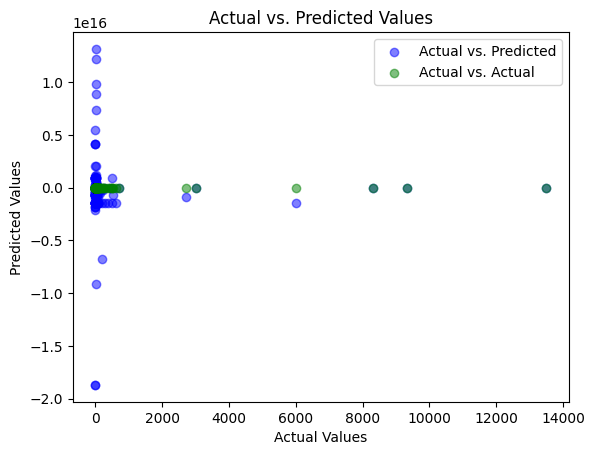

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values with different colors
plt.scatter(target_test, y_pred, alpha=0.5, label='Actual vs. Predicted', c='blue')
plt.scatter(target_test, target_test, alpha=0.5, label='Actual vs. Actual', c='green')  # Added for comparison with actual values
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Root Mean Squared Error:  2366.0507917859554
Range of Target Variable: 553027.0
Percentage of RMSE: 0.4278363970992294


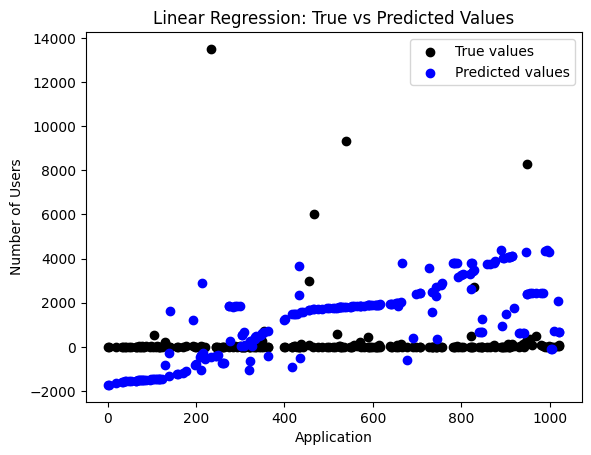

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'software_dataset.csv' is your dataset file
df = pd.read_csv('diff.csv')

# Preprocess 'entitlement' column to handle non-numeric values
df['Entitlement'] = df['Entitlement'].apply(lambda x: float(''.join(filter(str.isdigit, str(x)))))

# Select features and target variable
features = ['Application', 'Manufacturer']
X = df[features]

# Target variable
y = df['Entitlement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error: ", rmse)
# Assuming 'df' is your DataFrame
target_variable = 'Entitlement'

# Find the range of the target variable
range_of_target = df[target_variable].max() - df[target_variable].min()

print("Range of Target Variable:", range_of_target)
rmse = 2366.0507917859554
range_of_target = 553027.0

percentage_of_rmse = (rmse / range_of_target) * 100
print("Percentage of RMSE:", percentage_of_rmse)

# Plot the linear regression
plt.scatter(X_test.iloc[:, 0], y_test, color='black', label='True values')
plt.scatter(X_test.iloc[:, 0], predictions, color='blue', label='Predicted values')
plt.xlabel('Application')
plt.ylabel('Number of Users')
plt.title('Linear Regression: True vs Predicted Values')
plt.legend()
plt.show()
